In [23]:
# Importando Pandas, Statsmodels, Matplotlib e NumPy

import pandas as pd
import statsmodels.api as sm
import matplotlib as mt
import matplotlib.pyplot as plot
import numpy as np

In [24]:
# Inicialização #modificar

IBOVESPA = float(0)
USI = float(0)
preco_mensal = float(0)
retorno_mensal = float(0)
retorno_mensal_l = float(0)
Y_BB = float(0)
X_IBOV = float(0)
Xa = float(0)
CAPM = float(0)
CAPM_r = float(0)

In [25]:
# Lendo dados

IBOVESPA = pd.read_csv('^BVSP.csv', parse_dates = True, index_col = 'Date')
USI = pd.read_csv('USIM5.SA.csv',parse_dates = True, index_col = 'Date')
print(IBOVESPA.head())

               Open     High      Low    Close  Adj Close  Volume
Date                                                             
2000-01-03  17098.0  17408.0  16719.0  16930.0    16930.0     0.0
2000-01-04  16908.0  16908.0  15851.0  15851.0    15851.0     0.0
2000-01-05  15871.0  16302.0  15350.0  16245.0    16245.0     0.0
2000-01-06  16237.0  16499.0  15977.0  16107.0    16107.0     0.0
2000-01-07  16125.0  16449.0  16125.0  16309.0    16309.0     0.0


In [26]:
# Preços de fechamento 

preco_mensal = pd.concat([USI['Close'], IBOVESPA['Close']], axis=1)
preco_mensal.columns = ['USIMINAS', 'IBOVESPA']
print(preco_mensal.head())

            USIMINAS  IBOVESPA
Date                          
2000-01-03   2.13333   16930.0
2000-01-04   2.05556   15851.0
2000-01-05   2.25111   16245.0
2000-01-06   2.45556   16107.0
2000-01-07   2.55333   16309.0


In [27]:
# Retornos mensais

retorno_mensal = preco_mensal.pct_change(1) #ver log em numpy
retorno_mensal_l = retorno_mensal.dropna(axis=0)
print(retorno_mensal_l.head())

            USIMINAS  IBOVESPA
Date                          
2000-01-04 -0.036455 -0.063733
2000-01-05  0.095132  0.024856
2000-01-06  0.090822 -0.008495
2000-01-07  0.039816  0.012541
2000-01-10  0.103571  0.043718


In [28]:
# Definindo variáveis

Y_USI = retorno_mensal_l['USIMINAS']
X_IBOV = retorno_mensal_l['IBOVESPA']
print(Y_USI.head(),X_IBOV.head())

Xa = sm.tools.add_constant(X_IBOV)

Date
2000-01-04   -0.036455
2000-01-05    0.095132
2000-01-06    0.090822
2000-01-07    0.039816
2000-01-10    0.103571
Name: USIMINAS, dtype: float64 Date
2000-01-04   -0.063733
2000-01-05    0.024856
2000-01-06   -0.008495
2000-01-07    0.012541
2000-01-10    0.043718
Name: IBOVESPA, dtype: float64


In [29]:
# Modelo

CAPM = sm.OLS(Y_USI,Xa)
CAPM_r = CAPM.fit()
print(CAPM_r.summary())

Res = CAPM_r.resid

                            OLS Regression Results                            
Dep. Variable:               USIMINAS   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     2984.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:31:18   Log-Likelihood:                 10598.
No. Observations:                4785   AIC:                        -2.119e+04
Df Residuals:                    4783   BIC:                        -2.118e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.718      0.4

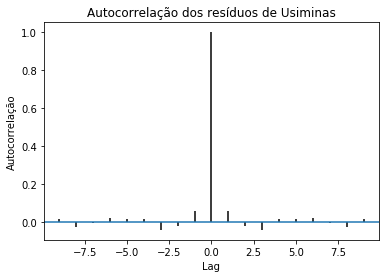

In [36]:
# Autocorrelograma 

plot.acorr(Res, maxlags=9)

plot.title('Autocorrelação dos resíduos de Usiminas')
plot.xlabel('Lag')
plot.ylabel('Autocorrelação')

plot.show()

In [30]:
# Teste Ljung-Box de Autocorrelação de Resíduos

LJ = sm.stats.diagnostic.acorr_ljungbox(Res)
print(LJ)

(array([15.17052573, 17.01634147, 25.03143133, 26.55193747, 27.97486566,
       30.11797037, 30.19595282, 33.71133485, 34.73707672, 35.36082921,
       35.36410869, 35.46736646, 35.7817865 , 35.91564201, 36.02180776,
       36.38436262, 37.44729852, 43.51639139, 51.85723193, 53.76461576,
       54.38493956, 59.9891568 , 68.04626256, 68.60809089, 68.6465679 ,
       69.34939218, 70.86140905, 70.87285178, 70.92491275, 78.26410913,
       79.50784055, 91.61070993, 91.72816124, 91.95133987, 93.9580143 ,
       93.97123594, 94.213003  , 94.69104037, 94.84072815, 96.27478154]), array([9.82246986e-05, 2.01812656e-04, 1.52086042e-05, 2.44864386e-05,
       3.68128707e-05, 3.73295537e-05, 8.74133236e-05, 4.58218059e-05,
       6.62923200e-05, 1.08339616e-04, 2.15753929e-04, 3.94402869e-04,
       6.41415707e-04, 1.07422178e-03, 1.75504310e-03, 2.55805309e-03,
       2.92553457e-03, 6.76124840e-04, 6.94964772e-05, 6.26831833e-05,
       8.68534764e-05, 2.24314799e-05, 2.42653381e-06, 3.54559904e

In [31]:
# Teste Breusch-Pagan de Heteroscedasticidade

BP = sm.stats.diagnostic.het_breuschpagan(Res,Xa)
print(BP)

(10.288130845857351, 0.0013388864768562267, 10.305989384120394, 0.0013347603709862607)
